
AWGN Channel Analysis:
Capacity for AWGN channel: 3459.43 bits/s


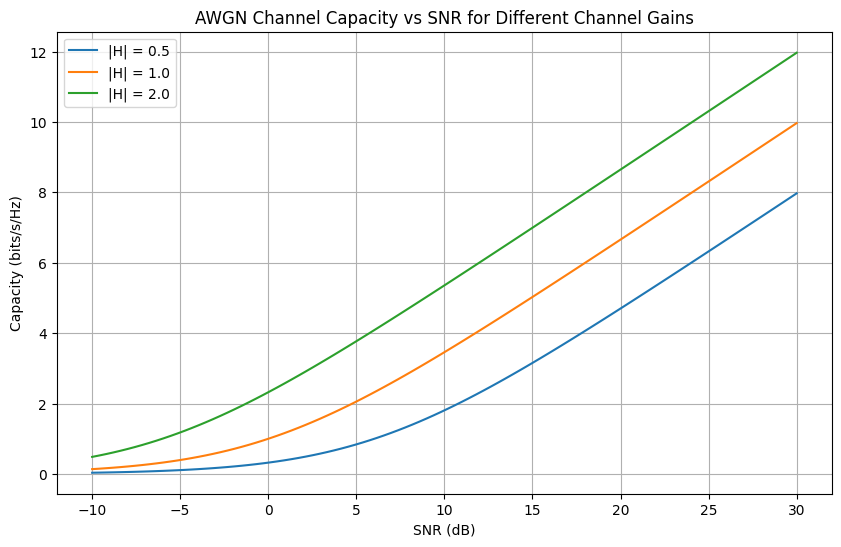

<Figure size 640x480 with 0 Axes>

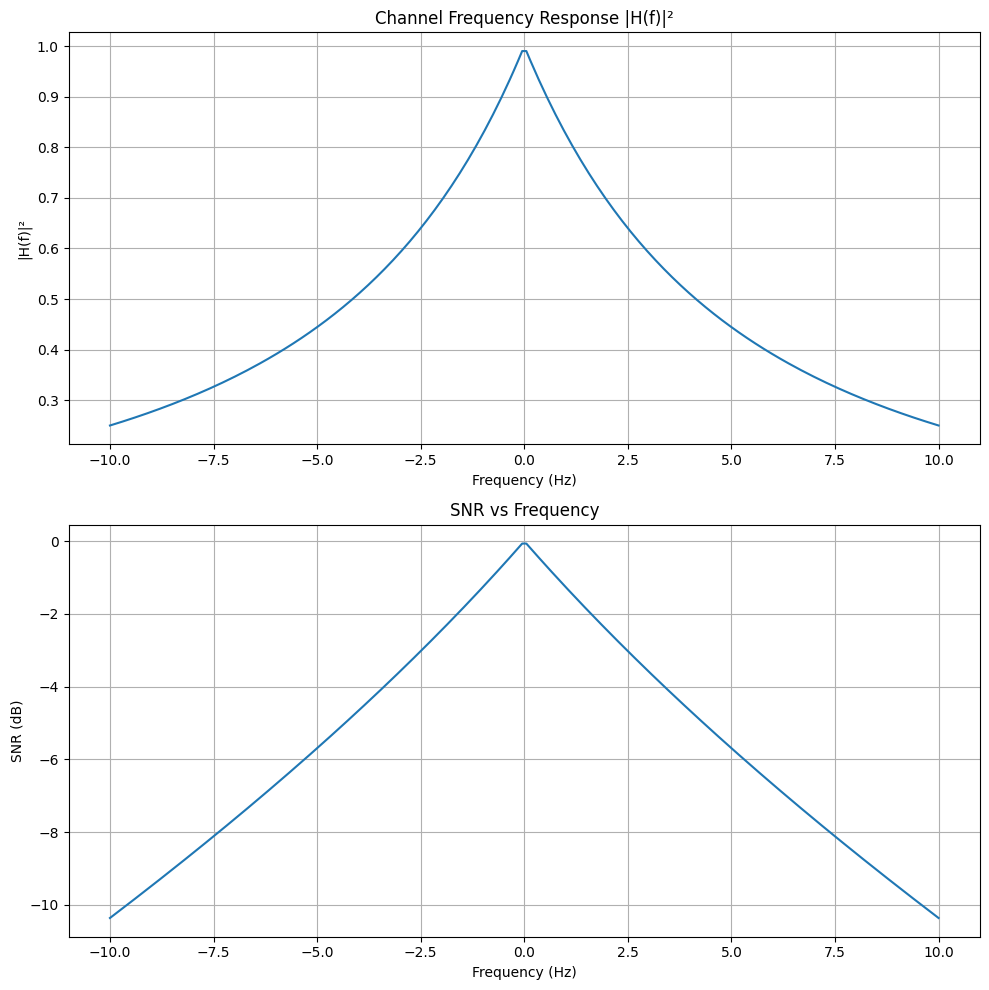

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

class ChannelAnalyzer:
    def __init__(self):
        """Initialize the channel analyzer with default parameters."""
        self.B = 1.0  # Bandwidth in Hz
        self.N = 1.0  # Noise power spectral density
        self.S = 1.0  # Signal power

    def awgn_capacity(self, H, B, S, N):
        """
        Calculate capacity for AWGN channel with limited bandwidth.

        Parameters:
        H (float): Channel gain (fixed)
        B (float): Bandwidth in Hz
        S (float): Signal power
        N (float): Noise power spectral density

        Returns:
        float: Channel capacity in bits/s
        """
        # Using the formula C = B * log2(1 + |H|^2 * S/N)
        capacity = B * np.log2(1 + np.abs(H)**2 * S/N)
        return capacity

    def frequency_selective_capacity(self, H_f, Sx_f, Sn_f, f_range):
        """
        Calculate capacity for frequency-selective channel.

        Parameters:
        H_f (callable): Channel frequency response H(f)
        Sx_f (callable): Signal power spectral density Sx(f)
        Sn_f (callable): Noise power spectral density Sn(f)
        f_range (tuple): Frequency range (f_min, f_max)

        Returns:
        float: Channel capacity in bits/s
        """
        # Define the integrand function
        def integrand(f):
            H_squared = np.abs(H_f(f))**2
            SNR = H_squared * Sx_f(f) / Sn_f(f)
            return np.log2(1 + SNR)

        # Integrate over the frequency range
        capacity, _ = integrate.quad(integrand, f_range[0], f_range[1])
        return capacity

    def plot_awgn_analysis(self, H_values, B=1.0):
        """
        Plot capacity vs SNR for different channel gains in AWGN channel.
        """
        SNR_db = np.linspace(-10, 30, 100)
        SNR_linear = 10**(SNR_db/10)

        plt.figure(figsize=(10, 6))
        for H in H_values:
            capacities = [self.awgn_capacity(H, B, S, 1) for S in SNR_linear]
            plt.plot(SNR_db, capacities, label=f'|H| = {np.abs(H):.1f}')

        plt.grid(True)
        plt.xlabel('SNR (dB)')
        plt.ylabel('Capacity (bits/s/Hz)')
        plt.title('AWGN Channel Capacity vs SNR for Different Channel Gains')
        plt.legend()
        return plt

    def plot_frequency_selective_analysis(self, f_range=(-10, 10)):
        """
        Plot capacity analysis for a frequency-selective channel.
        """
        # Example frequency-selective channel response
        def H_f(f):
            return 1 / (1 + 0.1*np.abs(f))  # Frequency-dependent attenuation

        # Example signal and noise spectral densities
        def Sx_f(f):
            return np.exp(-0.1*np.abs(f))  # Decaying signal spectrum

        def Sn_f(f):
            return 1.0  # Flat noise spectrum

        # Calculate capacity at different frequencies
        f = np.linspace(f_range[0], f_range[1], 200)
        H_response = [np.abs(H_f(freq))**2 for freq in f]
        SNR_f = [H_f(freq)**2 * Sx_f(freq)/Sn_f(freq) for freq in f]

        # Create subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

        # Plot channel frequency response
        ax1.plot(f, H_response)
        ax1.set_title('Channel Frequency Response |H(f)|²')
        ax1.set_xlabel('Frequency (Hz)')
        ax1.set_ylabel('|H(f)|²')
        ax1.grid(True)

        # Plot SNR vs frequency
        ax2.plot(f, 10*np.log10(SNR_f))
        ax2.set_title('SNR vs Frequency')
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('SNR (dB)')
        ax2.grid(True)

        plt.tight_layout()
        return plt

# Example usage
if __name__ == "__main__":
    analyzer = ChannelAnalyzer()

    # Analyze AWGN channel
    print("\nAWGN Channel Analysis:")
    H = 1.0  # Channel gain
    B = 1000.0  # Bandwidth
    S = 10.0  # Signal power
    N = 1.0  # Noise power
    capacity = analyzer.awgn_capacity(H, B, S, N)
    print(f"Capacity for AWGN channel: {capacity:.2f} bits/s")

    # Plot AWGN analysis
    analyzer.plot_awgn_analysis([0.5, 1.0, 2.0])
    plt.figure()

    # Analyze and plot frequency-selective channel
    analyzer.plot_frequency_selective_analysis()

    # Show all plots
    plt.show()


Capacity (quad integration): 3.46 bits/s
Capacity (numerical integration): 3.22 bits/s


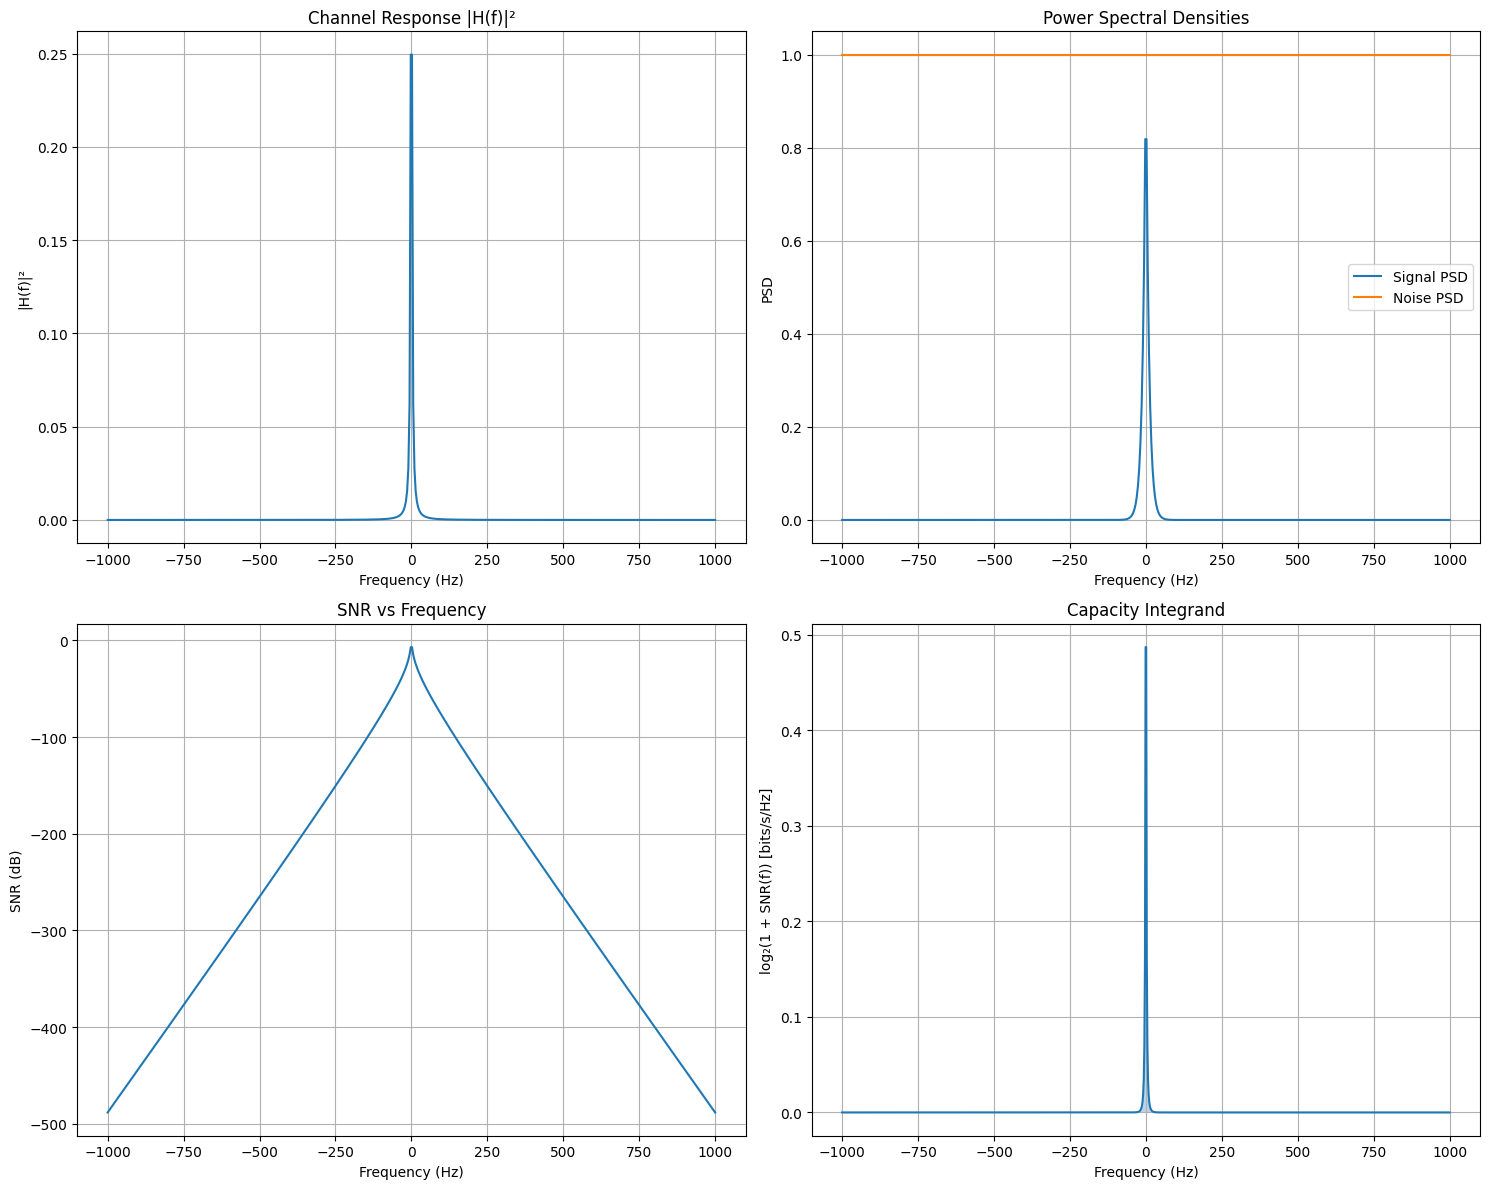

In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

class FrequencySelectiveChannel:
    def __init__(self):
        """Initialize channel parameters"""
        self.f_min = -1000  # Minimum frequency
        self.f_max = 1000  # Maximum frequency

    def channel_response(self, f):
        """
        Define channel frequency response H(f).
        This is an example of a low-pass channel response.
        """
        return 1 / (1 + 0.5*np.abs(f))

    def signal_psd(self, f):
        """
        Define signal power spectral density Sx(f).
        This example uses exponentially decaying power with frequency.
        """
        return np.exp(-0.1*np.abs(f))

    def noise_psd(self, f):
        """
        Define noise power spectral density Sn(f).
        This example uses white noise (constant PSD).
        """
        return 1.0

    def integrand(self, f):
        """
        Calculate the integrand of the capacity formula at frequency f.
        Returns the value inside the integral at each frequency point.
        """
        H_squared = np.abs(self.channel_response(f))**2
        SNR_f = H_squared * self.signal_psd(f) / self.noise_psd(f)
        return np.log2(1 + SNR_f)

    def calculate_capacity_quad(self):
        """
        Calculate channel capacity using scipy's quad integration.
        This method is more accurate but slower.
        """
        capacity, error = integrate.quad(self.integrand, self.f_min, self.f_max)
        return capacity, error

    def calculate_capacity_numerical(self, n_points=1000):
        """
        Calculate channel capacity using numerical integration (trapezoidal rule).
        This method is faster and gives us more insight into the process.
        """
        # Create frequency points
        f = np.linspace(self.f_min, self.f_max, n_points)
        df = (self.f_max - self.f_min) / (n_points - 1)

        # Calculate integrand at each frequency
        integrand_values = np.zeros(n_points)
        for i, freq in enumerate(f):
            integrand_values[i] = self.integrand(freq)

        # Use trapezoidal rule for integration
        capacity = np.trapz(integrand_values, dx=df)
        return capacity, f, integrand_values

    def plot_analysis(self):
        """
        Create comprehensive plots to understand the capacity calculation.
        """
        # Calculate capacity using both methods
        cap_quad, error = self.calculate_capacity_quad()
        cap_num, f, integrand_values = self.calculate_capacity_numerical()

        # Create frequency points for plotting
        f_plot = np.linspace(self.f_min, self.f_max, 500)

        # Calculate components at each frequency
        H_response = [np.abs(self.channel_response(freq))**2 for freq in f_plot]
        Sx = [self.signal_psd(freq) for freq in f_plot]
        Sn = [self.noise_psd(freq) for freq in f_plot]
        SNR = [h*s/n for h, s, n in zip(H_response, Sx, Sn)]

        # Create subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        # Plot channel response
        ax1.plot(f_plot, H_response)
        ax1.set_title('Channel Response |H(f)|²')
        ax1.set_xlabel('Frequency (Hz)')
        ax1.set_ylabel('|H(f)|²')
        ax1.grid(True)

        # Plot PSDs
        ax2.plot(f_plot, Sx, label='Signal PSD')
        ax2.plot(f_plot, Sn, label='Noise PSD')
        ax2.set_title('Power Spectral Densities')
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('PSD')
        ax2.legend()
        ax2.grid(True)

        # Plot SNR
        ax3.plot(f_plot, 10*np.log10(SNR))
        ax3.set_title('SNR vs Frequency')
        ax3.set_xlabel('Frequency (Hz)')
        ax3.set_ylabel('SNR (dB)')
        ax3.grid(True)

        # Plot integrand
        ax4.plot(f, integrand_values)
        ax4.fill_between(f, integrand_values, alpha=0.3)
        ax4.set_title('Capacity Integrand')
        ax4.set_xlabel('Frequency (Hz)')
        ax4.set_ylabel('log₂(1 + SNR(f)) [bits/s/Hz]')
        ax4.grid(True)

        plt.tight_layout()

        print(f"Capacity (quad integration): {cap_quad:.2f} bits/s")
        print(f"Capacity (numerical integration): {cap_num:.2f} bits/s")

        return plt

# Example usage
if __name__ == "__main__":
    channel = FrequencySelectiveChannel()

    # Plot comprehensive analysis
    channel.plot_analysis()
    plt.show()